In [2]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import utils

In [3]:
src = "lena.png"

In [16]:
with Image.open(src) as im:
    rgb = np.asanyarray(im)
    (h,w) = rgb.shape[0:2] # might be the other way around
    b = rgb[:,:,1]
    b = b/255
    b3 = np.dstack((b,b,b))


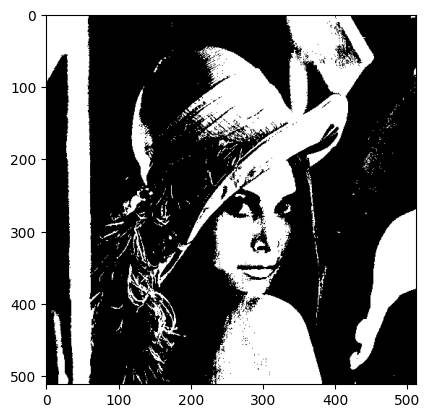

In [5]:
plt.imshow(b3)
plt.show()

In [6]:
print(b.dtype)
print(b[0,0:10])

float64
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [68]:
mask = np.matrix([[-1,-1,0,-1,-1],
                  [-1,-1,0,-1,-1],
                  [-1,-1,0,-1,-1],
                  [-1,-1,0,-1,-1],
                  [-1,-1,0,-1,-1],])
# mask = np.matrix([[-1,0,-1],
#                   [-1,0,-1],
#                   [-1,0,-1]])
(mh,mw) = mask.shape[0:2]

In [69]:
OUT_OF_BORDER_VALUE = 0
bin_out = np.zeros((h,w), dtype=float)
mask_radius = int((mh - 1)/2)

tmp_image = np.full((h+mh-1,w+mw-1), OUT_OF_BORDER_VALUE, dtype=float)
tmp_image[mask_radius:-mask_radius,mask_radius:-mask_radius] = b


for (x,y), value in np.ndenumerate(b):
    mask_mask = mask < 0
    img_slice = tmp_image[x:x+mw, y:y+mh]
    if np.all(((img_slice==mask) + mask_mask)):
        bin_out[x,y] = 0
    else:
        bin_out[x,y] = 1
    

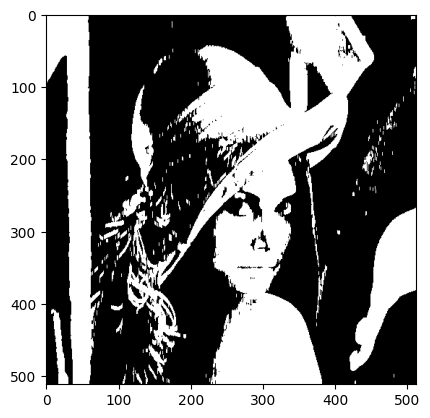

In [70]:
plt.imshow(np.dstack((bin_out,bin_out,bin_out)))
plt.show()